In [1]:
!pip install py7zr

In [2]:
import torch
from torch import nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from PIL import Image
import random
import requests
import pandas as pd
from pathlib import Path
import numpy as np
import os
import py7zr

In [3]:
# set device by checking if gpu is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [4]:
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

In [5]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# root directory for data
root_dir = 'drive/MyDrive/Colab Notebooks/Deep Learning Fundamentals/Assignment 2/cifar-10/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# with py7zr.SevenZipFile(root_dir + 'train.7z', mode='r') as archive:
#     archive.extractall(path='./')

# with py7zr.SevenZipFile(root_dir + 'test.7z', mode='r') as archive:
#     archive.extractall(path='./')

In [7]:
df = pd.read_csv(root_dir + 'trainLabels.csv')
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [8]:
labels = dict()

for _,row in df.iterrows():
    labels[row['id']] = row['label']

In [9]:
class CIFAR10(Dataset):
    def __init__(self, image_folder, labels, transform=None):
        """
        Args:
            image_folder (str): Path to the folder containing images.
            labels (list): List of labels corresponding to each image.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.image_folder = image_folder
        self.transform = transform
        self.image_filenames = os.listdir(image_folder)  # List all image files in the folder
        self.labels = labels
        self.classes = sorted(list(set(labels.values())))

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):

        # Load image
        img_name = os.path.join(self.image_folder, self.image_filenames[idx])
        image = Image.open(img_name).convert("RGB")  # Convert image to RGB mode

        # Apply transformations (if any)
        if self.transform:
            image = self.transform(image)

        img_id = int(self.image_filenames[idx].split('.')[0])
        img_class = self.labels[img_id]
        label = self.classes.index(img_class)

        return image, label

In [10]:
train_transform = transforms.Compose([
    transforms.Resize(size=(192,192)), # resize the image
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # apply data augmentation
    transforms.ToTensor() # convert the image into a tensor
])

In [11]:
train_data = CIFAR10('train/', labels, train_transform)

In [12]:
print(train_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [13]:
print(len(train_data))

50000


In [14]:
image,label = train_data[100]
print(image.shape)
print(label)

torch.Size([3, 192, 192])
4


Text(0.5, 1.0, 'deer')

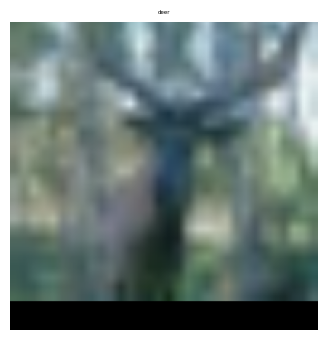

In [15]:
# rearrange the image dimensions
image_permute = image.permute(1,2,0)

# display the image
plt.figure(figsize=(6,4))
plt.imshow(image_permute)
plt.axis("off")
plt.title(train_data.classes[label], fontsize=4)

In [16]:
BATCH_SIZE = 32

# convert dataset to dataloader
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

# test_dataloader = DataLoader(test_data,
#                              batch_size=BATCH_SIZE,
#                              num_workers=os.cpu_count(),
#                              shuffle=False)

In [17]:
# get a batch of images and labels from the dataloader
train_images,train_labels = next(iter(train_dataloader))
print(train_images.shape)
print(train_labels.shape)

torch.Size([32, 3, 192, 192])
torch.Size([32])
